![header](https://i.imgur.com/I4ake6d.jpg)

# IN SITU BALTIC SEA TRAINING

<div style="text-align: right"><i> 13-05-Part-five-out-of-five </i></div>

***
# BAL `NRT` product/dataset: managing files (thermosal)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
                <li><span><a href="#2.2.-Auxiliary-functions" data-toc-modified-id="2.2.-Auxiliary-functions">2.2. Auxiliary functions</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Thermosal-(TS)-data" data-toc-modified-id="3.-Thermosal-(TS)-data">3. Thermosal (TS) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-the-file" data-toc-modified-id="3.1.-Reading-the-file"> 3.1. Reading the file</a></span></li>
                <li><span><a href="#3.2.-Data-visualization" data-toc-modified-id="3.2.-Data-visualization">3.2. Data visualization</a></span></li>
                <ul>
                 <li><span><a href="#3.2.1.-Trajectory-animation" data-toc-modified-id="3.2.1-Trajectory-animation">3.2.1 Trajectory animation</a></span></li>
                    <li><span><a href="#3.2.2.-Along-track-variable-evolution" data-toc-modified-id="3.2.2-Along-track-variable-evolution">3.2.2 Along track variable evolution</a></span></li>
        <li><span><a href="#3.2.3.-Overall-variable-evolution" data-toc-modified-id="3.2.3.-Overall-variable-evolution">3.2.3. Overall variable evolution</a></span></li></ul>
            </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

## 1. Introduction

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the data source types available are the Thermosal. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Thermosal ('TS' data type) and let's check its data. <br> If you wanna skip the downloading part you can use the netCDF files available at the `/data/files/TS` instead.    

## 2. Setup

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import IPython
import datetime
import numpy as np
import xarray
import folium
from folium import plugins
from dateutil.relativedelta import relativedelta
import branca
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell int he notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)
</div>

### 2.2. Auxiliary functions

Please `run the next cell` to load into memory some useful functions we will use later on:

In [2]:
def get_subset(start,end,ds):
    #Subsets a dataset (ds) from start to end given dates
    i_start = ds['TIME'].astype(str).values.tolist().index(ds['TIME'][ds['TIME'].astype(str).str.contains(start) == True].astype(str).values[0])
    i_end = ds['TIME'].astype(str).values.tolist().index(ds['TIME'][ds['TIME'].astype(str).str.contains(end) == True].astype(str).values[-1])
    return ds.isel(TIME=slice(i_start, i_end),LATITUDE=slice(i_start, i_end),LONGITUDE=slice(i_start, i_end),POSITION=slice(i_start, i_end))

## 3. Thermosal (TS) data

Thermosalinographs are devices on board of vessels that measure watter intakes (i.e temperature, conductivity etc) as it moves. The resulting data feature is a trajectory-like time serie.

Let's see the data of one of the available thermosal in the Baltic.<br>`Run the next cell` to see the thermosal files already available in the /data folder:

In [4]:
output_dir = os.path.join(os.getcwd(),'data','files','TS')
os.listdir(output_dir)

['GL_TS_TS_A8RH6.nc',
 'GL_TS_TS_FNHO.nc',
 'GL_TS_TS_SHIP.nc',
 'GL_TS_TS_FNAV.nc']

### 3.1. Reading the file

`Set one` of the above available `file name` and `run the next cells`:

In [5]:
file = 'GL_TS_TS_FNHO.nc'
path = os.path.join(os.path.join(os.getcwd(), 'data', 'files','TS'), file)

In [6]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:                 (DEPTH: 1, LATITUDE: 921630, LONGITUDE: 921630, POSITION: 921630, TIME: 921630)
Coordinates:
  * TIME                    (TIME) datetime64[ns] 2001-12-21T22:48:00 ... 202...
  * LATITUDE                (LATITUDE) float32 53.8 53.8 53.78 ... 42.98 43.15
  * LONGITUDE               (LONGITUDE) float32 6.25 6.22 6.18 ... 5.85 5.25
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC                 (TIME) float32 ...
    POSITION_QC             (POSITION) float32 ...
    POSITIONING_SYSTEM      (POSITION) object ...
    DC_REFERENCE            (TIME) object ...
    DEPH                    (TIME, DEPTH) float32 ...
    DEPH_QC                 (TIME, DEPTH) float32 ...
    DEPH_DM                 (TIME, DEPTH) object ...
    PSAL                    (TIME, DEPTH) float64 ...
    PSAL_QC                 (TIME, DEPTH) float32 ...
    PSAL_DM                 (TIME, DEPTH) object ...
    PSAL_ADJUSTED_ERROR     (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_ERROR_DM  (TIME, DEPTH) object ...
    PSAL_ADJUSTED           (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC        (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED_DM        (TIME, DEPTH) object ...
    SSJT                    (TIME, DEPTH) float64 ...
    SSJT_QC                 (TIME, DEPTH) float32 ...
    SSJT_DM                 (TIME, DEPTH) object ...
    CNDC                    (TIME, DEPTH) float64 ...
    CNDC_QC                 (TIME, DEPTH) float32 ...
    CNDC_DM                 (TIME, DEPTH) object ...
Attributes:
    data_type:                      OceanSITES trajectory data
    format_version:                 1.2
    platform_code:                  FNHO
    date_update:                    2020-02-04T01:55:20Z
    institution:                    IRD  Institut de recherche pour le develo...
    institution_edmo_code:          440
    site_code:                       
    wmo_platform_code:              FNHO
    coriolis_platform_code:         FNHO
    platform_name:                  COLIBRI
    ices_platform_code:             35MJ
    source:                         vessel of opportunity
    source_platform_category_code:  32
    history:                        2020-02-04T01:55:20Z : Creation
    data_mode:                      M
    quality_control_indicator:      6
    quality_index:                  A
    references:                     http://marine.copernicus.eu,http://www.co...
    comment:                         
    Conventions:                    CF-1.6 OceanSITES-Manual-1.2 Copernicus-I...
    netcdf_version:                 netCDF-4 classic model
    title:                          Global Ocean - In Situ Observation Copern...
    summary:                         
    naming_authority:               OceanSITES
    id:                             GL_TS_TS_FNHO
    cdm_data_type:                  Trajectory
    family_label:                   vessel
    family_code:                    TS
    area:                           Global Ocean
    geospatial_lat_min:             4.84833
    geospatial_lat_max:             71.74900
    geospatial_lon_min:             -80.12000
    geospatial_lon_max:             30.22484
    geospatial_vertical_min:        5.00
    geospatial_vertical_max:        5.00
    time_coverage_start:            2001-12-21T22:48:00Z
    time_coverage_end:              2020-01-03T07:57:00Z
    institution_references:          
    contact:                        codac@ifremer.fr
    author:                         Coriolis and Copernicus data provider
    data_assembly_center:           Coriolis
    pi_name:                         
    distribution_statement:         These data follow Copernicus standards; t...
    citation:                       These data were collected and made freely...
    update_interval:                daily
    qc_manual:                      OceanSITES User's Manual v1.2
    last_date_observation:          2020-01-03T07:57:00Z
    last_latitude_observation:   

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>Let's list now the available variables: `run the next cell`

In [7]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
POSITIONING_SYSTEM:Positioning system
DC_REFERENCE:Station/Location unique identifier in data centre
DEPH:Depth
DEPH_QC:quality flag
DEPH_DM:method of data processing
PSAL:Practical salinity
PSAL_QC:quality flag
PSAL_DM:method of data processing
PSAL_ADJUSTED_ERROR:Practical salinity adjusted error
PSAL_ADJUSTED_ERROR_DM:method of data processing
PSAL_ADJUSTED:Practical salinity adjusted
PSAL_ADJUSTED_QC:quality flag
PSAL_ADJUSTED_DM:method of data processing
SSJT:Sea temperature from TSG
SSJT_QC:quality flag
SSJT_DM:method of data processing
CNDC:Electrical conductivity
CNDC_QC:quality flag
CNDC_DM:method of data processing


Let's watch out the temporal coverage: `run the next cell`

In [8]:
start = datetime.datetime.strptime(ds.attrs['time_coverage_start'], '%Y-%m-%dT%H:%M:%SZ')
end = datetime.datetime.strptime(ds.attrs['time_coverage_end'], '%Y-%m-%dT%H:%M:%SZ')
years = relativedelta(end, start).years
print(str(years)+' years ('+ds.attrs['time_coverage_start']+'/'+ds.attrs['time_coverage_end']+')')

18 years (2001-12-21T22:48:00Z/2020-01-03T07:57:00Z)


The number of years is too large so we will just continue working with a sample: ony one year. 
<br> Choose the year next and `run the next cell`:

In [9]:
targeted_year = '2019'
yearSubset = get_subset(targeted_year,targeted_year, ds)

### 3.2. Data visualization

#### 3.2.1. Trajectory animation

As stated before, the thermosal is on board of a mobile platform (a vessel).
<br>Let's create now a geojson feature representing the vessel; we will populate it next: `run the next cell`

In [10]:
vessel = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []
    },
    'properties': {
        'times': [],
    }
}

Before passing it all original coordinates, let's check if all of them are flagged as good or not!

In In Situ TAC netCDFs all variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable.`run the next cell` to check the flag values convention:

In [11]:
pd.DataFrame(data=yearSubset['POSITION_QC'].attrs['flag_values'],
             index=yearSubset['POSITION_QC'].attrs['flag_meanings'].split(' '), columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


Users are recommended to use only the data flagged as 1, they so called 'good data'. Let's then check the available flags for the coordinates (time and position) to see if we need to get rid of not-good values: `run the next cells`

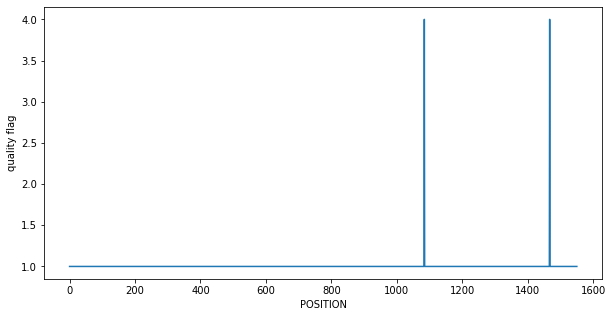

In [12]:
yearSubset['POSITION_QC'].plot(aspect=2, size=5)

In [13]:
set(yearSubset['POSITION_QC'].values.tolist())

{1.0, 4.0}

From above, we see that there are some QC flags values different from 1, meaning we have to filter out the not-good values before anything else!: `run the next cell`

In [14]:
lats = yearSubset['LATITUDE'].where(yearSubset['POSITION_QC']==1).values.tolist()
lats = [x[0] for x in lats]
lons = yearSubset['LONGITUDE'].where(yearSubset['POSITION_QC']==1).values.tolist()
lons = [x[0] for x in lons]
times = yearSubset['TIME'].astype(str).values.tolist()

Let's populate the geojson:

In [15]:
for time, lat, lon in zip(times, lats, lons):
    base = [lat,lon]
    if(any(x is None for x in base)):
        continue
    if(any(np.isnan(x) for x in base)):
        continue
    vessel['properties']['times'].append(time[:19])
    vessel['geometry']['coordinates'].append([lon, lat])

In [16]:
mean_lat, mean_lon = np.nanmean(lats), np.nanmean(lons)
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=3)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [vessel],
}, add_last_point=True, loop=False, period='PT1H').add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).
</div>

#### 3.2.2. Along track variable evolution

Water properties varies a lot from Baltic Sea to the Mediterranean Sea. So let's focus in one of this transect next:

In [17]:
start,end = '2019-07-01', '2019-07-10'
BAL2MEDSubset = get_subset(start,end,yearSubset)

Let's focus on one of the variables to visualize its data!: `set one and run the next cell`

In [18]:
param = 'PSAL'

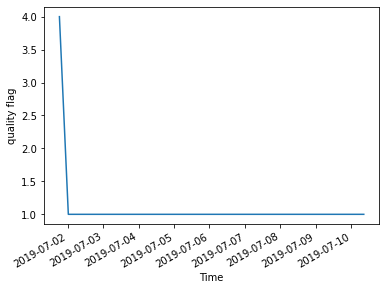

In [19]:
BAL2MEDSubset[param+'_QC'][:,0].plot()

In [20]:
set(BAL2MEDSubset[param+'_QC'][:,0].values.tolist())

{1.0, 4.0}

Let's get only the good data for the only depth (0):

In [21]:
var = BAL2MEDSubset[param][:,0].where(BAL2MEDSubset[param+'_QC'][:,0] == 1).values.tolist()

Let's set a colormap:

In [22]:
linear_cmap = branca.colormap.LinearColormap(['green', 'yellow', 'red'],vmin=np.nanmin(var), vmax=np.nanmax(var))
linear_cmap

Let's plot the temperature values along the trajectory:

In [23]:
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)
lats = BAL2MEDSubset['LATITUDE'].values.tolist()
lons = BAL2MEDSubset['LONGITUDE'].values.tolist()
for k in range(0,len(times)-1):
    try:
        color = linear_cmap(var[k])
        folium.CircleMarker([lats[k], lons[k]], radius=2,color=color).add_to(m)
    except Exception as e:
        pass
m.fit_bounds(m.get_bounds())
colormap = branca.colormap.LinearColormap(['green', 'yellow', 'red']).scale(int(np.nanmin(var)), int(np.nanmax(var))).to_step(6)
colormap.caption = 'Temperature variation along the vessel track'
m.add_child(colormap)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).
</div>

#### 3.2.3. Overall variable evolution

Let's check the overall parameter evolution over time!: `run the next cell`

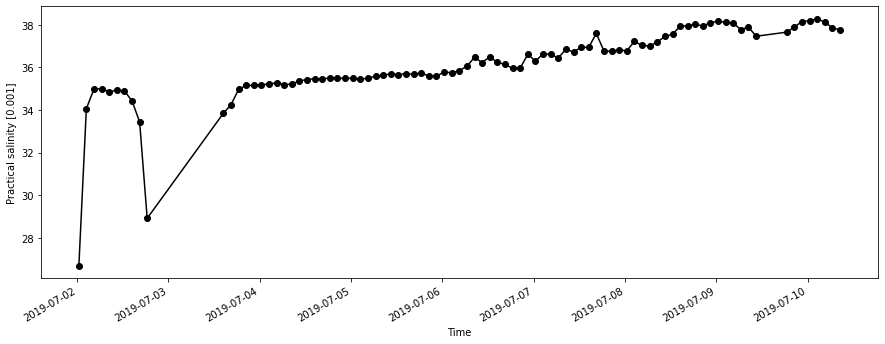

In [24]:
BAL2MEDSubset[param][:,0].where(BAL2MEDSubset[param+'_QC'][:,0] == 1).plot(aspect=3, size=5, marker='o', color='k')

***

## 4. Wrap-up

So far you should already know how to deal with trajectory-like Time Serie data from drifting buoys. <br> `If you don't please ask us! it is the moment!`